In [1]:
import pandas as pd
import re 

In [2]:
import nltk

In [3]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyanshukumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyanshukumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyanshukumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.metrics  import classification_report
from sklearn import metrics
import time

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
import xgboost 
from sklearn.metrics  import classification_report
from sklearn import metrics

In [11]:
import xgboost

In [12]:
from sklearn.metrics  import classification_report
from sklearn import metrics
import time

In [13]:
df1 = pd.read_csv('profession_tweets.csv')
df1.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,businessman
1,154,german businessman confidence slides german bu...,businessman
2,1101,bbc poll indicates economic gloom citizens in ...,businessman
3,1976,lifestyle governs mobile choice faster bett...,educational
4,917,enron bosses in $168m payout eighteen former e...,businessman


In [14]:
category = list(df1['Category'].unique())
category

['businessman', 'educational', 'politician', 'sportsman', 'entertainment']

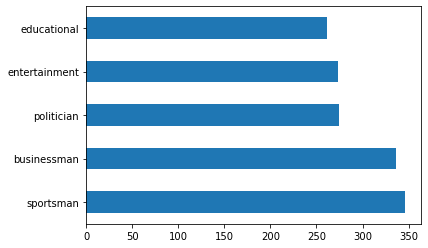

In [15]:
df1['Category'].value_counts().plot(kind='barh')
plt.show()

In [16]:
df1.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [17]:
def preprocess(text):
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    token = word_tokenize(text)
    stop = stopwords.words("english")
    words = [t for t in token if t not in stop]
    lem = [WordNetLemmatizer().lemmatize(w) for w in words]
    return lem

In [18]:
df1["Preprocessed_Text"] = df1['Text'].apply(lambda x: preprocess(x))
df1.head(10)

,ArticleId,Text,Category,Preprocessed_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,businessman,"[worldcom, ex, bos, launch, defence, lawyer, d..."
1,154,german businessman confidence slides german bu...,businessman,"[german, businessman, confidence, slide, germa..."
2,1101,bbc poll indicates economic gloom citizens in ...,businessman,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,educational,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,businessman,"[enron, boss, payout, eighteen, former, enron,..."
5,1582,howard truanted to play snooker conservative...,politician,"[howard, truanted, play, snooker, conservative..."
6,651,wales silent on grand slam talk rhys williams ...,sportsman,"[wale, silent, grand, slam, talk, rhys, willia..."
7,1797,french honour for director parker british film...,entertainment,"[french, honour, director, parker, british, fi..."
8,2034,car giant hit by mercedes slump a slump in pro...,businessman,"[car, giant, hit, mercedes, slump, slump, prof..."
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,"[fockers, fuel, festive, film, chart, comedy, ..."


In [19]:
def find_common_words(df, category):
    cat_df = df[df["Category"]==category]
    words = [word for tokens in cat_df["Preprocessed_Text"] for word in tokens]

    words_counter = Counter(words)
 
    return words_counter.most_common(10)

In [20]:
print("Most common words in each category")
for c in category:
    print(c, " News")
    print(find_common_words(df1, c))
    print()

Most common words in each category
businessman  News
[('said', 1100), ('year', 618), ('bn', 535), ('u', 523), ('mr', 394), ('company', 393), ('firm', 374), ('market', 346), ('would', 309), ('also', 279)]

educational  News
[('said', 1064), ('people', 647), ('mobile', 437), ('phone', 396), ('game', 396), ('service', 371), ('one', 367), ('year', 364), ('mr', 350), ('new', 349)]

politician  News
[('said', 1445), ('mr', 1100), ('would', 712), ('labour', 494), ('election', 479), ('government', 471), ('party', 464), ('blair', 396), ('minister', 373), ('people', 372)]

sportsman  News
[('said', 636), ('game', 487), ('year', 448), ('first', 350), ('win', 337), ('time', 336), ('england', 329), ('player', 311), ('two', 290), ('back', 279)]

entertainment  News
[('film', 721), ('said', 594), ('year', 450), ('best', 430), ('award', 336), ('u', 290), ('also', 277), ('one', 274), ('show', 273), ('star', 259)]



In [21]:
df1['Preprocessed_Text2'] = df1['Preprocessed_Text'].apply(' '.join)
df1.head()

,ArticleId,Text,Category,Preprocessed_Text,Preprocessed_Text2
0,1833,worldcom ex-boss launches defence lawyers defe...,businessman,"[worldcom, ex, bos, launch, defence, lawyer, d...",worldcom ex bos launch defence lawyer defendin...
1,154,german businessman confidence slides german bu...,businessman,"[german, businessman, confidence, slide, germa...",german businessman confidence slide german bus...
2,1101,bbc poll indicates economic gloom citizens in ...,businessman,"[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,educational,"[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,businessman,"[enron, boss, payout, eighteen, former, enron,...",enron boss payout eighteen former enron direct...


In [22]:
X = df1['Preprocessed_Text2']
y = df1['Category']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
tf_vec = TfidfVectorizer()
train_features = tf_vec.fit(X_train)
train_features = tf_vec.transform(X_train)
test_features = tf_vec.transform(X_test)

In [25]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    results ={}
    
    start = time.time()
    model.fit(train_features, y_train)
    end = time.time()
    results['train_time'] = end - start
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)

    results['classification_report'] = classification_report(y_test, test_predicted)
        
    return results

In [26]:
sv = svm.SVC()
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
xgb = xgboost.XGBClassifier(random_state = 1)
tree = DecisionTreeClassifier()
nb = MultinomialNB()


# Fit and evaluate models
results = {}
for cls in [sv, ab, gb, xgb, tree, nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, train_features, y_train, test_features, y_test)

In [27]:
for res in results:
    print (res)
    print()
    for i in results[res]:
        print (i, ':')
        print(results[res][i])
        print()
    print ('-----')
    print()

SVC

train_time :
2.036956310272217

classification_report :
               precision    recall  f1-score   support

  businessman       0.90      0.97      0.93        64
  educational       0.95      0.91      0.93        46
entertainment       1.00      0.98      0.99        58
   politician       0.96      0.90      0.93        52
    sportsman       0.97      0.99      0.98        78

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.95       298
 weighted avg       0.96      0.96      0.96       298


-----

AdaBoostClassifier

train_time :
0.7572510242462158

classification_report :
               precision    recall  f1-score   support

  businessman       0.73      0.80      0.76        64
  educational       0.94      0.70      0.80        46
entertainment       0.75      0.74      0.75        58
   politician       0.79      0.65      0.72        52
    sportsman       0.78      0.94      0.85        78

     accuracy           

In [28]:
def classify_article(path):
    file = open(path, 'r')
    artcl = file.read()

    artcl = preprocess(artcl)
    artcl = ' '.join(artcl)

    test = tf_vec.transform([artcl])

    predict = nb.predict(test)
    category = predict[0]

    file.close()

    return category

In [29]:
print(classify_article('Articles/art1.txt'))

sportsman


In [30]:
print(classify_article('Articles/art2.txt'))

businessman


In [31]:
print(classify_article('Articles/art3.txt'))

politician


In [32]:
print(classify_article('Articles/art4.txt'))

entertainment


In [33]:
print(classify_article('Articles/test.txt'))

educational
